In [55]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, LineString, Polygon
import itertools

In [56]:
streets =  gpd.read_file('../../data/StreetNetwork/G2_edges.shp')
buildings = gpd.read_file('../../data/Buildings/buildings.geojson')
maracana = gpd.read_file('../../data/Maracana/maracana.geojson')
ameba = gpd.read_file('../../data/Ameba_Area/Ameba_Area.geojson')
metropolitan_cities = gpd.read_file('../../data/RIO DE JANEIRO MAPS/metropolitan_cities/metropolitan_cities.geojson')
neighborhoods = gpd.read_file('../../data/RIO DE JANEIRO MAPS/RJ-BAIRRO/RJ-BAIRRO.shp')
                      
location_point = (-22.911667, -43.230278)
dist = 2300
parking_dist = 1000

# Adding the Ameba is if it were a Rio's neighborhood

## Plotting

<AxesSubplot:>

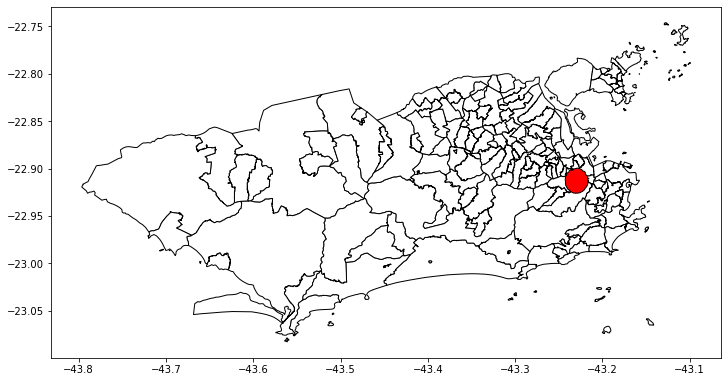

In [59]:
ax = neighborhoods.plot(color='white', edgecolor='black', figsize=(12,8))
ameba.plot(ax=ax, color='red', edgecolor='black', figsize=(12,8))

## Catching the intersection

In [60]:
inter = gpd.overlay(neighborhoods, ameba, how='intersection')
inter

,NM_BAIRRO,V002,geometry
0,Mangueira,17574.0,"POLYGON ((-43.23370 -22.90061, -43.23375 -22.9..."
1,Maracanã,25213.0,"POLYGON ((-43.23394 -22.91898, -43.23388 -22.9..."
2,Praça da Bandeira,8585.0,"MULTIPOLYGON (((-43.21732 -22.91211, -43.21759..."
3,São Cristóvão,24602.0,"POLYGON ((-43.22860 -22.90654, -43.23001 -22.9..."
4,São Francisco Xavier,8307.0,"POLYGON ((-43.24111 -22.90458, -43.24083 -22.9..."
5,Tijuca,163095.0,"POLYGON ((-43.23628 -22.92388, -43.23624 -22.9..."
6,Vila Isabel,85770.0,"POLYGON ((-43.24206 -22.90770, -43.24172 -22.9..."


<AxesSubplot:>

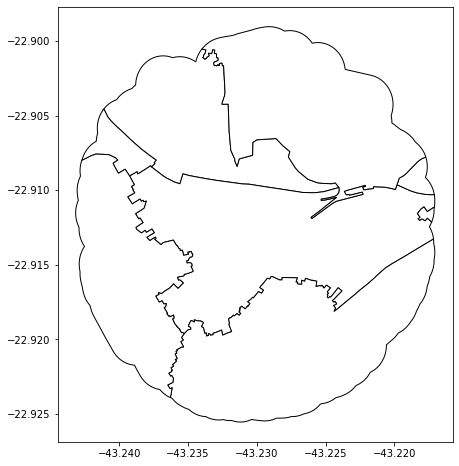

In [61]:
inter.plot(color='white', edgecolor='black', figsize=(12,8))

## Rio's map with the ameba-like region removed:

In [62]:
res_inter = inter.overlay(neighborhoods, how='symmetric_difference')

<AxesSubplot:>

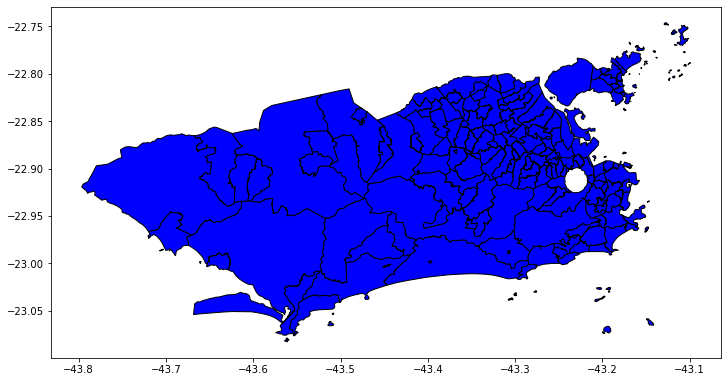

In [63]:
res_inter.plot(color='blue', edgecolor='black', figsize=(12,8))

In [64]:
res_inter

,NM_BAIRRO_1,V002_1,NM_BAIRRO_2,V002_2,geometry
0,Mangueira,17574.0,NaN,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."
1,NaN,NaN,Abolição,11356.0,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8..."
2,NaN,NaN,Acari,26967.0,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8..."
3,NaN,NaN,Alto da Boa Vista,9189.0,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
4,NaN,NaN,Anchieta,55634.0,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8..."
...,...,...,...,...,...
156,NaN,NaN,Vila Valqueire,32232.0,"POLYGON ((-43.36708 -22.89711, -43.36718 -22.8..."
157,NaN,NaN,Vila da Penha,25462.0,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
158,NaN,NaN,Vista Alegre,8622.0,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."
159,NaN,NaN,Zumbi,2016.0,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8..."


## Rio's map with the ameba-lika area added as if it were a normal region:

In [65]:
ameba_as_region = pd.concat([res_inter, ameba], ignore_index=True)

<AxesSubplot:>

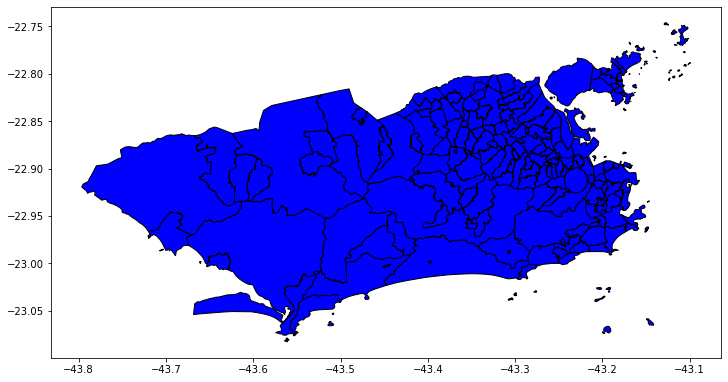

In [66]:
ameba_as_region.plot(color='blue', edgecolor='black', figsize=(12,8))

# Getting the final map

In [67]:
ameba_as_region.drop(['V002_1', 'V002_2'], axis=1)

,NM_BAIRRO_1,NM_BAIRRO_2,geometry
0,Mangueira,NaN,"POLYGON ((-43.24119 -22.90463, -43.24119 -22.9..."
1,NaN,Abolição,"POLYGON ((-43.30071 -22.89112, -43.30094 -22.8..."
2,NaN,Acari,"POLYGON ((-43.34222 -22.82782, -43.34253 -22.8..."
3,NaN,Alto da Boa Vista,"POLYGON ((-43.29408 -22.97996, -43.29412 -22.9..."
4,NaN,Anchieta,"POLYGON ((-43.41149 -22.83311, -43.41164 -22.8..."
...,...,...,...
157,NaN,Vila da Penha,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8..."
158,NaN,Vista Alegre,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8..."
159,NaN,Zumbi,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8..."
160,NaN,Água Santa,"POLYGON ((-43.30348 -22.91473, -43.30400 -22.9..."


<AxesSubplot:>

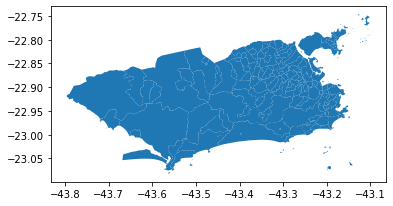

In [68]:
ameba_as_region.plot()

In [69]:
final_map = pd.concat([metropolitan_cities, ameba_as_region], ignore_index=True)

In [70]:
final_map = final_map.drop(['ID', 'CD_GEOCODM', 'V002_1', 'V002_2'], axis=1)

<AxesSubplot:>

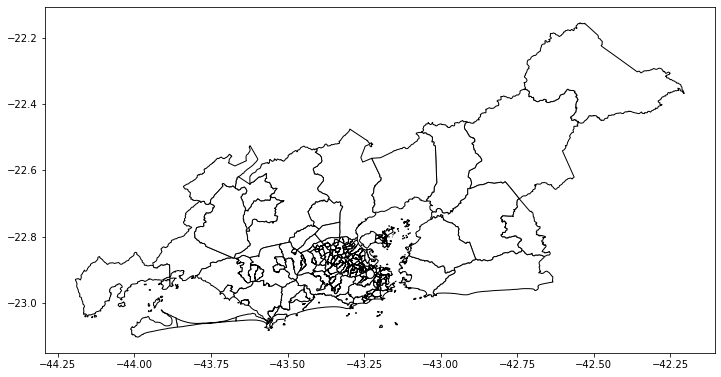

In [71]:
final_map.plot(color='white', edgecolor='black', figsize=(12,8))

In [72]:
final_map

,NM_MUNICIP,geometry,NM_BAIRRO_1,NM_BAIRRO_2
0,BELFORD ROXO,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6...",NaN,NaN
1,CACHOEIRAS DE MACACU,"POLYGON ((-42.79038 -22.37813, -42.78943 -22.3...",NaN,NaN
2,DUQUE DE CAXIAS,"POLYGON ((-43.41519 -22.60109, -43.41566 -22.6...",NaN,NaN
3,GUAPIMIRIM,"POLYGON ((-42.95809 -22.46615, -42.95703 -22.4...",NaN,NaN
4,ITABORAÍ,"POLYGON ((-42.94340 -22.70671, -42.94301 -22.7...",NaN,NaN
...,...,...,...,...
178,NaN,"POLYGON ((-43.31466 -22.84846, -43.31551 -22.8...",NaN,Vila da Penha
179,NaN,"POLYGON ((-43.31923 -22.83183, -43.31931 -22.8...",NaN,Vista Alegre
180,NaN,"POLYGON ((-43.17556 -22.82367, -43.17560 -22.8...",NaN,Zumbi
181,NaN,"POLYGON ((-43.30348 -22.91473, -43.30400 -22.9...",NaN,Água Santa


# Saving

In [73]:
import os
dir = '../../data/RIO DE JANEIRO MAPS/final_map'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [74]:
final_map.to_file(dir + '/final_map.geojson')